## United States Airlines Analysis

### Project Task: Week 1

### Applied data science with Python¶

#### 1. Import and aggregate data:

#### a. Collect information related to flights, airports (e.g., type of airport and elevation), and runways(e.g., length_ft, width_ft, surface, and number of runways). Gather all fields you believe might cause avoidable delays in one dataset.

#### Hint: In this case, you would have to determine the keys to join the tables. A data description will be useful.¶

In [1]:
# import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_airlines=pd.read_excel("Airlines.xlsx")

In [3]:
df_airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
df_airlines.shape

(518556, 9)

In [5]:
df_airports=pd.read_excel("airports.xlsx")

In [6]:
df_airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [7]:
df_airports.shape

(73805, 18)

In [8]:
df_runways=pd.read_excel("runways.xlsx")

In [9]:
df_runways.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


In [10]:
df_runways.shape

(43977, 20)

In [11]:
df_runways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43977 entries, 0 to 43976
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         43977 non-null  int64  
 1   airport_ref                43977 non-null  int64  
 2   airport_ident              43977 non-null  object 
 3   length_ft                  43753 non-null  float64
 4   width_ft                   41088 non-null  float64
 5   surface                    43520 non-null  object 
 6   lighted                    43977 non-null  int64  
 7   closed                     43977 non-null  int64  
 8   le_ident                   43793 non-null  object 
 9   le_latitude_deg            15016 non-null  float64
 10  le_longitude_deg           15000 non-null  float64
 11  le_elevation_ft            12781 non-null  float64
 12  le_heading_degT            14624 non-null  float64
 13  le_displaced_threshold_ft  2883 non-null   flo

In [12]:
df_runways = df_runways.drop(['le_ident', 'le_latitude_deg','le_longitude_deg', 'le_elevation_ft', 'le_heading_degT',
       'le_displaced_threshold_ft', 'he_ident', 'he_latitude_deg','he_longitude_deg', 'he_elevation_ft', 'he_heading_degT',
       'he_displaced_threshold_ft'], axis = 1)

In [13]:
df_runways.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0
2,254165,6525,00AL,2300.0,200.0,TURF,0,0
3,270932,6526,00AR,40.0,40.0,GRASS,0,0
4,322128,322127,00AS,1450.0,60.0,Turf,0,0


In [14]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73805 entries, 0 to 73804
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 73805 non-null  int64  
 1   ident              73805 non-null  object 
 2   type               73805 non-null  object 
 3   name               73805 non-null  object 
 4   latitude_deg       73805 non-null  float64
 5   longitude_deg      73805 non-null  float64
 6   elevation_ft       59683 non-null  float64
 7   continent          38086 non-null  object 
 8   iso_country        73546 non-null  object 
 9   iso_region         73805 non-null  object 
 10  municipality       68739 non-null  object 
 11  scheduled_service  73805 non-null  object 
 12  gps_code           42996 non-null  object 
 13  iata_code          9160 non-null   object 
 14  local_code         32975 non-null  object 
 15  home_link          3492 non-null   object 
 16  wikipedia_link     107

In [15]:
df_airports =df_airports.drop(['continent', 'iso_country', 'iso_region','municipality', 'gps_code','local_code', 'home_link',
                       'wikipedia_link', 'keywords'], axis=1)

In [16]:
df_airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,scheduled_service,iata_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,no,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,no,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,no,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,no,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,no,NaN


In [17]:
df1= pd.merge(df_airports,df_runways, left_on = "ident", right_on = "airport_ident")
df1.drop(['id_x', 'id_y'], axis=1, inplace=True)

In [18]:
df1

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,scheduled_service,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,no,NaN,6523,00A,80.0,80.0,ASPH-G,1,0
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,no,NaN,6524,00AK,2500.0,70.0,GRVL,0,0
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,no,NaN,6525,00AL,2300.0,200.0,TURF,0,0
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,no,NaN,6526,00AR,40.0,40.0,GRASS,0,0
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,1100.0,no,NaN,322127,00AS,1450.0,60.0,Turf,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43972,ZYTX,large_airport,Shenyang Taoxian International Airport,41.639801,123.483002,198.0,yes,SHE,27243,ZYTX,10499.0,148.0,CON,1,0
43973,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,42.882801,129.451004,624.0,yes,YNJ,27244,ZYYJ,8530.0,148.0,CON,1,0
43974,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,NaN,yes,YKH,317861,ZYYK,8202.0,NaN,NaN,0,0
43975,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,no,NaN,346788,ZZ-0003,1800.0,15.0,Turf,0,0


In [19]:
df = pd.merge(df_airlines,df1,how = "inner", left_on = "AirportFrom", right_on = "iata_code" )

In [20]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,elevation_ft,scheduled_service,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,1,CO,269,SFO,IAH,3,15,205,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
1,1,CO,269,SFO,IAH,3,15,205,1,KSFO,...,13.0,yes,SFO,3878,KSFO,8648.0,200.0,ASP,1,0
2,1,CO,269,SFO,IAH,3,15,205,1,KSFO,...,13.0,yes,SFO,3878,KSFO,11870.0,200.0,ASP,1,0
3,1,CO,269,SFO,IAH,3,15,205,1,KSFO,...,13.0,yes,SFO,3878,KSFO,10602.0,200.0,ASP,1,0
4,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160271,488365,CO,2,GUM,HNL,3,400,430,0,PGUM,...,298.0,yes,GUM,5433,PGUM,10014.0,150.0,asphalt,1,0
2160272,506855,CO,2,GUM,HNL,4,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160273,506855,CO,2,GUM,HNL,4,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,10014.0,150.0,asphalt,1,0
2160274,525138,CO,2,GUM,HNL,5,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0


In [21]:
df.drop_duplicates(subset=['id'], keep='first', inplace=True)

In [22]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,elevation_ft,scheduled_service,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,1,CO,269,SFO,IAH,3,15,205,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
4,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
8,9,DL,2606,SFO,MSP,3,35,216,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
12,129,DL,1580,SFO,DTW,3,345,270,0,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
16,150,UA,756,SFO,DEN,3,348,158,0,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160266,451344,CO,2,GUM,HNL,1,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160268,469866,CO,2,GUM,HNL,2,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160270,488365,CO,2,GUM,HNL,3,400,430,0,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160272,506855,CO,2,GUM,HNL,4,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0


### b. When it comes to on-time arrivals, different airlines perform differently based on the amount of experience they have. The major airlines in this field include US Airways Express (founded in 1967) Continental Airlines (founded in 1934), and Express Jet (founded in 1986). Pull such information specific to various airlines from the Wikipedia page link given below.

#### https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States.

#### Hint: Here, you should use web scraping to learn how long an airline has been operating¶

In [23]:
import bs4
from bs4 import BeautifulSoup as bs
import requests

In [24]:
url="https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States"

In [25]:
page=pd.read_html(url)

In [26]:
page

[                 Airline  Image IATA ICAO         Callsign  \
 0        Alaska Airlines    NaN   AS  ASA           ALASKA   
 1          Allegiant Air    NaN   G4  AAY        ALLEGIANT   
 2      American Airlines    NaN   AA  AAL         AMERICAN   
 3         Avelo Airlines    NaN   XP  VXP            AVELO   
 4         Breeze Airways    NaN   MX  MXY             MOXY   
 5        Delta Air Lines    NaN   DL  DAL            DELTA   
 6       Eastern Airlines    NaN   2D  EAL          EASTERN   
 7      Frontier Airlines    NaN   F9  FFT  FRONTIER FLIGHT   
 8      Hawaiian Airlines    NaN   HA  HAL         HAWAIIAN   
 9                JetBlue    NaN   B6  JBU          JETBLUE   
 10    Southwest Airlines    NaN   WN  SWA        SOUTHWEST   
 11       Spirit Airlines    NaN   NK  NKS     SPIRIT WINGS   
 12  Sun Country Airlines    NaN   SY  SCX      SUN COUNTRY   
 13       United Airlines    NaN   UA  UAL           UNITED   
 
                          Primary hubs, Secondary hub

In [27]:
page[0]

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, Secondary hubs",Founded,Notes
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San Franci...,1932,Founded as McGee Airways and commenced operati...
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las VegasCincinnatiFort Walton BeachIndianapol...,1997,Founded as WestJet Express and commenced opera...
2,American Airlines,NaN,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago-O'HareLos An...,1926,Founded as American Airways and commenced oper...
3,Avelo Airlines,NaN,XP,VXP,AVELO,BurbankNew HavenOrlando,1987,First did business as Casino Express Airlines ...
4,Breeze Airways,NaN,MX,MXY,MOXY,CharlestonHartfordNew OrleansNorfolkProvoTampa,2018,NaN
5,Delta Air Lines,NaN,DL,DAL,DELTA,AtlantaBostonDetroitLos AngelesMinneapolis/St....,1924,Founded as Huff Daland Dusters and commenced o...
6,Eastern Airlines,NaN,2D,EAL,EASTERN,MiamiNew York-JFK,2010,NaN
7,Frontier Airlines,NaN,F9,FFT,FRONTIER FLIGHT,DenverAtlantaChicago-O'HareCincinnatiCleveland...,1994,NaN
8,Hawaiian Airlines,NaN,HA,HAL,HAWAIIAN,HonoluluKahului,1929,Founded as Inter-Island Airways in early 1929 ...
9,JetBlue,NaN,B6,JBU,JETBLUE,New York-JFKBostonLos AngelesFort LauderdaleOr...,1998,Founded as New Air and commenced operations in...


In [28]:
page[6]

,Airline,Image,IATA,ICAO,Callsign,"Primary Hubs, Secondary Hubs",Founded,Notes
0,Comco,NaN,NaN,NaN,NaN,NaN,2002,NaN
1,Janet,NaN,NaN,WWW,JANET,Las Vegas,1972,NaN
2,Justice Prisoner and Alien Transportation System,NaN,NaN,JUD,JUSTICE,Oklahoma City,1980,Commenced operations in 1995.


In [29]:
wiki_page = [page[0],page[1],page[2],page[3],page[4],page[5],page[6]]

In [30]:
wiki=pd.concat(wiki_page,ignore_index=True)

In [31]:
wiki

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, Secondary hubs",Founded,Notes,"Primary Hubs, Secondary Hubs"
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San Franci...,1932.0,Founded as McGee Airways and commenced operati...,NaN
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las VegasCincinnatiFort Walton BeachIndianapol...,1997.0,Founded as WestJet Express and commenced opera...,NaN
2,American Airlines,NaN,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago-O'HareLos An...,1926.0,Founded as American Airways and commenced oper...,NaN
3,Avelo Airlines,NaN,XP,VXP,AVELO,BurbankNew HavenOrlando,1987.0,First did business as Casino Express Airlines ...,NaN
4,Breeze Airways,NaN,MX,MXY,MOXY,CharlestonHartfordNew OrleansNorfolkProvoTampa,2018.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
136,Lifestar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,Life Lion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,Comco,NaN,NaN,NaN,NaN,NaN,2002.0,NaN,NaN
139,Janet,NaN,NaN,WWW,JANET,NaN,1972.0,NaN,Las Vegas


### c. You should then get all the information gathered so far in one place¶

In [32]:
wiki_df = wiki[['IATA', "Founded"]]
wiki_df

,IATA,Founded
0,AS,1932.0
1,G4,1997.0
2,AA,1926.0
3,XP,1987.0
4,MX,2018.0
...,...,...
136,NaN,NaN
137,NaN,NaN
138,NaN,2002.0
139,NaN,1972.0


In [33]:
# combine wikipedia data with merged data df
final_df =df.merge(wiki_df, left_on ='Airline', right_on = "IATA")

In [34]:
final_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,IATA,Founded
0,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
1,231,AA,526,SFO,DFW,3,360,215,0,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
2,234,AA,552,SFO,MIA,3,360,315,1,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
3,905,AA,810,SFO,ORD,3,385,255,0,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
4,1739,AA,24,SFO,JFK,3,425,325,1,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434919,497838,9E,4292,LWB,JFK,3,890,110,1,KLWB,...,LWB,20390,KLWB,7004.0,150.0,ASP,1,0,9E,1985.0
434920,516333,9E,4292,LWB,JFK,4,890,110,0,KLWB,...,LWB,20390,KLWB,7004.0,150.0,ASP,1,0,9E,1985.0
434921,534123,9E,4292,LWB,JFK,5,890,110,0,KLWB,...,LWB,20390,KLWB,7004.0,150.0,ASP,1,0,9E,1985.0
434922,69058,9E,3752,ABR,MSP,7,410,76,1,KABR,...,ABR,3358,KABR,6901.0,100.0,CON,1,0,9E,1985.0


### d. The total passenger traffic may also contribute to flight delays. The term hub refers to busy commercial airports. Large hubs are airports that account for at least 1 percent of the total passenger enplanements in the United States. Airports that account for 0.25 percent to 1 percent of total passenger enplanements are considered medium hubs. Pull passenger traffic data from the Wikipedia page given below using webscraping and collate it in a table.

#### https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

In [35]:
url2="https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States"
table = pd.read_html(url2)

In [36]:
table

[    Rank(2021)                             Airports (large hubs) IATACode  \
 0            1  Hartsfield–Jackson Atlanta International Airport      ATL   
 1            2           Dallas/Fort Worth International Airport      DFW   
 2            3                      Denver International Airport      DEN   
 3            4                      O'Hare International Airport      ORD   
 4            5                 Los Angeles International Airport      LAX   
 5            6           Charlotte Douglas International Airport      CLT   
 6            7                     Orlando International Airport      MCO   
 7            8                  Harry Reid International Airport      LAS   
 8            9          Phoenix Sky Harbor International Airport      PHX   
 9           10                       Miami International Airport      MIA   
 10          11              Seattle–Tacoma International Airport      SEA   
 11          12              George Bush Intercontinental Airpor

In [37]:
table[0].head()

,Rank(2021),Airports (large hubs),IATACode,Major cities served,State,2021[3],2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10],2013[11],2012[12]
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,36676010,20559866,53505795,51865797,50251964,50501858,49340732,46604273,45308407,45798928
1,2,Dallas/Fort Worth International Airport,DFW,Dallas & Ft. Worth,TX,30005266,18593421,35778573,32821799,31816933,31283579,31589839,30804567,29038128,28022904
2,3,Denver International Airport,DEN,Denver,CO,28645527,16243216,33592945,31362941,29809097,28267394,26280043,26000591,25496885,25799841
3,4,O'Hare International Airport,ORD,Chicago,IL,26350976,14606034,40871223,39873927,38593028,37589899,36305668,33843426,32317835,32171795
4,5,Los Angeles International Airport,LAX,Los Angeles,CA,23663410,14055777,42939104,42624050,41232432,39636042,36351272,34314197,32425892,31326268


In [38]:
table[0]['traffic_change19_20'] = table[0]['2020[4]'] - table[0]['2019[5]']

In [39]:
table[0]['traffic_change19_20']

0    -32945929
1    -17185152
2    -17349729
3    -26265189
4    -28883327
5    -11246819
6    -14094543
7    -14144302
8    -11902116
9    -12635024
10   -15539351
11   -13222751
12   -22766836
13   -15175289
14    -9935245
15   -12123197
16   -20034173
17   -11320716
18   -14663925
19    -7087602
20   -10253150
21    -7833332
22    -6011981
23    -8010836
24   -11246485
25    -5845178
26    -4921659
27    -8021459
28    -8021965
29    -5542206
Name: traffic_change19_20, dtype: int64

In [40]:
table[0]['traffic_change18_19'] = table[0]['2019[5]'] - table[0]['2018[6]']

In [41]:
table[0]['traffic_change18_19']

0     1639998
1     2956774
2     2230004
3      997296
4      315054
5     1917739
6     1359791
7      933349
8      810972
9      399391
10     976854
11     747911
12     415886
13     363161
14     338658
15     830975
16     -11487
17     706203
18     692856
19     614111
20     713719
21     -87129
22     610242
23     474468
24     335100
25    -596237
26     918307
27     262494
28     228278
29     761914
Name: traffic_change18_19, dtype: int64

In [42]:
table[0]["hubs"]=str("large hubs")

In [43]:
table[0]=table[0][['IATACode', 'traffic_change19_20', 'traffic_change18_19', 'hubs']]

In [44]:
table[0]

,IATACode,traffic_change19_20,traffic_change18_19,hubs
0,ATL,-32945929,1639998,large hubs
1,DFW,-17185152,2956774,large hubs
2,DEN,-17349729,2230004,large hubs
3,ORD,-26265189,997296,large hubs
4,LAX,-28883327,315054,large hubs
5,CLT,-11246819,1917739,large hubs
6,MCO,-14094543,1359791,large hubs
7,LAS,-14144302,933349,large hubs
8,PHX,-11902116,810972,large hubs
9,MIA,-12635024,399391,large hubs


In [45]:
#calculating traffic change for medium hubs
table[1]

,Rank(2021),Airports (medium hubs),IATACode,City served,State,2021[3],2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10],2013[11],2012[12]
0,31,Dallas Love Field,DAL,Dallas,TX,6487563,3669930,8408457,8134848,7876769,7554596,7040921,4522341,4023779,3902628
1,32,Daniel K. Inouye International Airport,HNL,Honolulu,HI,5830928,3126391,9988678,9578505,9743989,9656340,9656340,9463000,9466995,9225848
2,33,Portland International Airport,PDX,Portland,OR,5759879,3455877,9797408,9940866,9435473,9071154,8340234,7878760,7452603,7142620
3,34,William P. Hobby Airport,HOU,Houston,TX,5560780,3127178,7069614,6937061,6741870,6285181,5937944,5800726,5377050,5043737
4,35,Southwest Florida International Airport,RSW,Fort Myers,FL,5080805,2947139,5144467,4719568,4461304,4350650,4231134,4025959,3788870,3634152
5,36,St. Louis Lambert International Airport,STL,St. Louis,MO,5070471,3041765,7946986,7822274,7372805,6793076,6239231,6108758,6216104,6208750
6,37,Sacramento International Airport,SMF,Sacramento,CA,4760275,2710342,6454413,6031630,5460526,4969366,4816440,4384616,4255145,4357899
7,38,Luis Muñoz Marín International Airport,SJU,San Juan,PR,4738725,2362851,4590117,4033412,4163587,4343354,4218785,4150828,4103197,4204478
8,39,Raleigh-Durham International Airport,RDU,Raleigh,NC,4311049,2337496,6919429,6416822,5851004,5401714,4954717,4673869,4482016,4490374
9,40,Louis Armstrong New Orleans International Airport,MSY,New Orleans,LA,4017147,2632606,6717105,6565482,6005527,5569705,5329696,4870569,4576539,4293624


In [46]:
table[1]=table[1].drop(['2021[3]','2013[11]','2012[12]'],axis=1)

In [47]:
table[1].head()

,Rank(2021),Airports (medium hubs),IATACode,City served,State,2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10]
0,31,Dallas Love Field,DAL,Dallas,TX,3669930,8408457,8134848,7876769,7554596,7040921,4522341
1,32,Daniel K. Inouye International Airport,HNL,Honolulu,HI,3126391,9988678,9578505,9743989,9656340,9656340,9463000
2,33,Portland International Airport,PDX,Portland,OR,3455877,9797408,9940866,9435473,9071154,8340234,7878760
3,34,William P. Hobby Airport,HOU,Houston,TX,3127178,7069614,6937061,6741870,6285181,5937944,5800726
4,35,Southwest Florida International Airport,RSW,Fort Myers,FL,2947139,5144467,4719568,4461304,4350650,4231134,4025959


In [48]:
table[1]['traffic_change19_20'] = table[1]['2020[4]'] - table[1]['2019[5]']
table[1]['traffic_change18_19'] = table[1]['2019[5]'] - table[1]['2018[6]']
table[1]['hubs'] = str('Medium_hub')

In [49]:
table[1] = table[1][['IATACode', 'traffic_change19_20', 'traffic_change18_19','hubs']]
table[1].head()

,IATACode,traffic_change19_20,traffic_change18_19,hubs
0,DAL,-4738527,273609,Medium_hub
1,HNL,-6862287,410173,Medium_hub
2,PDX,-6341531,-143458,Medium_hub
3,HOU,-3942436,132553,Medium_hub
4,RSW,-2197328,424899,Medium_hub


In [50]:
#join table[0] and table[1]
wiki_table = [table[0],table[1]]

In [51]:
wiki_table=pd.concat(wiki_table,ignore_index=True)

In [52]:
wiki_table

,IATACode,traffic_change19_20,traffic_change18_19,hubs
0,ATL,-32945929,1639998,large hubs
1,DFW,-17185152,2956774,large hubs
2,DEN,-17349729,2230004,large hubs
3,ORD,-26265189,997296,large hubs
4,LAX,-28883327,315054,large hubs
...,...,...,...,...
60,BOI,-1066509,114569,Medium_hub
61,MEM,-1302461,105359,Medium_hub
62,RNO,-1185313,113334,Medium_hub
63,ABQ,-1772528,-5819,Medium_hub


In [53]:
df=final_df.merge(wiki_table, left_on ='iata_code', right_on = "IATACode")

In [54]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,width_ft,surface,lighted,closed,IATA,Founded,IATACode,traffic_change19_20,traffic_change18_19,hubs
0,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-20034173,-11487,large hubs
1,231,AA,526,SFO,DFW,3,360,215,0,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-20034173,-11487,large hubs
2,234,AA,552,SFO,MIA,3,360,315,1,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-20034173,-11487,large hubs
3,905,AA,810,SFO,ORD,3,385,255,0,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-20034173,-11487,large hubs
4,1739,AA,24,SFO,JFK,3,425,325,1,KSFO,...,200.0,ASP,1,0,AA,1926.0,SFO,-20034173,-11487,large hubs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364272,506267,9E,4052,DAL,MEM,4,370,90,0,KDAL,...,150.0,CON,1,0,9E,1985.0,DAL,-4738527,273609,Medium_hub
364273,512858,9E,3704,DAL,MEM,4,705,92,1,KDAL,...,150.0,CON,1,0,9E,1985.0,DAL,-4738527,273609,Medium_hub
364274,518247,9E,4060,DAL,MEM,4,990,90,0,KDAL,...,150.0,CON,1,0,9E,1985.0,DAL,-4738527,273609,Medium_hub
364275,524678,9E,4052,DAL,MEM,5,370,90,1,KDAL,...,150.0,CON,1,0,9E,1985.0,DAL,-4738527,273609,Medium_hub


### 2. You should then examine the missing values in each field, perform missing value treatment, and justify your actions.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364277 entries, 0 to 364276
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   364277 non-null  int64  
 1   Airline              364277 non-null  object 
 2   Flight               364277 non-null  int64  
 3   AirportFrom          364277 non-null  object 
 4   AirportTo            364277 non-null  object 
 5   DayOfWeek            364277 non-null  int64  
 6   Time                 364277 non-null  int64  
 7   Length               364277 non-null  int64  
 8   Delay                364277 non-null  int64  
 9   ident                364277 non-null  object 
 10  type                 364277 non-null  object 
 11  name                 364277 non-null  object 
 12  latitude_deg         364277 non-null  float64
 13  longitude_deg        364277 non-null  float64
 14  elevation_ft         364277 non-null  float64
 15  scheduled_service

In [56]:
df = df.drop(['id','AirportFrom','airport_ident','iata_code','AirportTo','surface', 'ident',
                          'IATA', 'IATACode','name'], axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364277 entries, 0 to 364276
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Airline              364277 non-null  object 
 1   Flight               364277 non-null  int64  
 2   DayOfWeek            364277 non-null  int64  
 3   Time                 364277 non-null  int64  
 4   Length               364277 non-null  int64  
 5   Delay                364277 non-null  int64  
 6   type                 364277 non-null  object 
 7   latitude_deg         364277 non-null  float64
 8   longitude_deg        364277 non-null  float64
 9   elevation_ft         364277 non-null  float64
 10  scheduled_service    364277 non-null  object 
 11  airport_ref          364277 non-null  int64  
 12  length_ft            364277 non-null  float64
 13  width_ft             364277 non-null  float64
 14  lighted              364277 non-null  int64  
 15  closed           

In [58]:
df.isnull().sum()

Airline                0
Flight                 0
DayOfWeek              0
Time                   0
Length                 0
Delay                  0
type                   0
latitude_deg           0
longitude_deg          0
elevation_ft           0
scheduled_service      0
airport_ref            0
length_ft              0
width_ft               0
lighted                0
closed                 0
Founded                0
traffic_change19_20    0
traffic_change18_19    0
hubs                   0
dtype: int64

In [59]:
df.head()

,Airline,Flight,DayOfWeek,Time,Length,Delay,type,latitude_deg,longitude_deg,elevation_ft,scheduled_service,airport_ref,length_ft,width_ft,lighted,closed,Founded,traffic_change19_20,traffic_change18_19,hubs
0,AA,2466,3,20,195,1,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,large hubs
1,AA,526,3,360,215,0,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,large hubs
2,AA,552,3,360,315,1,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,large hubs
3,AA,810,3,385,255,0,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,large hubs
4,AA,24,3,425,325,1,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,large hubs


### 3. Perform data visualization and share your insights on the following points:¶

### a. According to the data provided, approximately 70% of Southwest Airlines flights are delayed. Visualize it to compare it with the data of other airlines¶

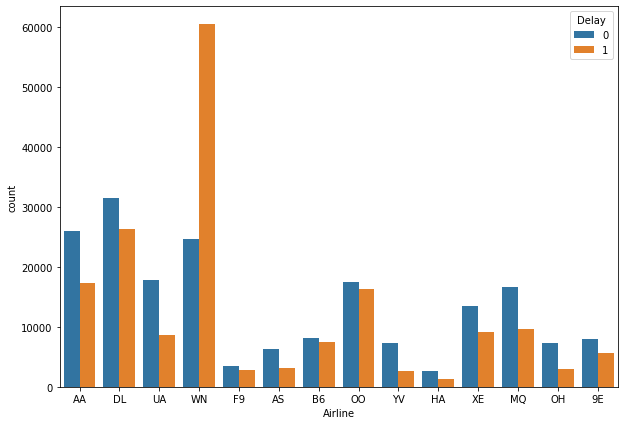

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(df['Airline'],hue=df['Delay'])
plt.show()

### b. Flights were delayed on various weekdays. Which day of the week is the safest for travel?

In [61]:
weekday_df = df[['DayOfWeek','Delay']].value_counts().reset_index()

<AxesSubplot:xlabel='DayOfWeek', ylabel='0'>

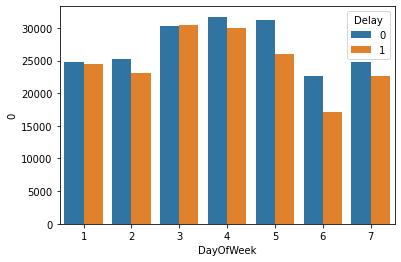

In [62]:
sns.barplot(weekday_df['DayOfWeek'], weekday_df[0], hue= weekday_df['Delay'])

### c. Which airlines should be recommended for short-, medium-, and long-distance travel?

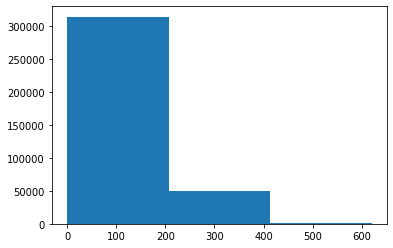

In [63]:
plt.hist(df['Length'], bins = 3)
plt.show()

In [64]:
df['Airline'][df['Length']<200].value_counts()

WN    75941
DL    43872
OO    32965
AA    30246
MQ    26076
XE    22114
UA    16388
9E    13573
B6    11628
OH     9963
YV     9884
AS     6350
F9     5406
HA     3034
Name: Airline, dtype: int64

##### Above Airlines are preferred for short distance travelling

In [65]:
df['Airline'][df['Length']>400].value_counts()

UA    549
AA    304
DL    226
B6     83
AS     31
HA     14
Name: Airline, dtype: int64

##### Above Airlines are preffered for long distance travelling and the remaining airlines are preffered for medium distance travelling

### d. Do you notice any patterns in the departure times of long-duration flights?

In [66]:
df['Time'][df['Length']>400]

46345     1045
46348     1045
46356     1045
46364     1045
46367     1045
          ... 
315043    1416
315049    1416
315055    1416
315061    1416
315067    1416
Name: Time, Length: 1207, dtype: int64

##### From above reference we come to know that only one flight of Airline(HA) is only one flight that travels a long distance with same departure time of 1045 time

### 4. How many flights were delayed at large hubs compared to medium hubs? Use appropriate visualization to represent your findings¶

<AxesSubplot:xlabel='hubs', ylabel='count'>

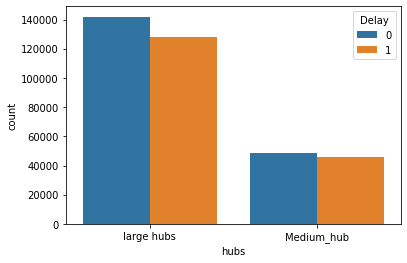

In [67]:
sns.countplot(df['hubs'], hue = df['Delay'])

##### From the above graph we notice that almost 130000 flights are delayed in large hubs and almost 42000 flights are delayed in medium hubs

### 5. Use hypothesis testing strategies to discover:

#### a. If the airport's altitude has anything to do with flight delays for incoming and departing flights¶

In [68]:
from scipy.stats import chi2_contingency
table = [df['latitude_deg'],df['Delay']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=194730.438, p=1.000
Probably independent


##### From above calculation it is clear that Airports altitude is independent and it has nothing to do with Flight delay for incoming and departing flights

#### b. If the number of runways at an airport affects flight delays

In [69]:
from scipy.stats import chi2_contingency
table = [df['airport_ref'],df['Delay']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=200241.469, p=1.000
Probably independent


##### From above calculation it is clear that Number of runways at an airport is independent and it has nothing to do with Flight delay¶

#### c. If the duration of a flight (length) affects flight delays

In [70]:
from scipy.stats import spearmanr
data1 = df['Length']
data2 = df['Delay']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.002, p=0.203
Probably independent


##### Both the variables are independent hence duration of flight does not affect flight delays

### 6. Find the correlation matrix between the flight delay predictors, create a heatmap to visualize this, and share your findings

In [71]:
predictor = df.drop(['Delay'], axis=1)
corr = predictor.corr()

In [72]:
corr

,Flight,DayOfWeek,Time,Length,latitude_deg,longitude_deg,elevation_ft,airport_ref,length_ft,width_ft,lighted,closed,Founded,traffic_change19_20,traffic_change18_19
Flight,1.000000,0.003249,0.034959,-0.311840,0.168127,0.061268,0.124437,-0.042421,0.016064,0.010186,0.064012,0.029169,0.389930,-0.048014,0.010379
DayOfWeek,0.003249,1.000000,0.002218,0.013059,-0.010100,-0.005075,0.000010,0.002675,0.004768,0.003414,-0.004520,-0.004811,-0.005840,-0.005420,0.005002
Time,0.034959,0.002218,1.000000,-0.045729,-0.024743,-0.002804,0.039522,-0.014048,0.029940,0.038049,-0.001339,-0.006927,0.033776,-0.084557,0.070448
Length,-0.311840,0.013059,-0.045729,1.000000,0.028905,0.068559,-0.070187,-0.012986,0.083335,0.062138,0.029629,-0.062091,-0.318902,-0.112389,-0.009942
latitude_deg,0.168127,-0.010100,-0.024743,0.028905,1.000000,0.087885,0.208233,-0.095324,0.004430,-0.034404,0.205215,0.087013,0.042304,-0.053065,-0.114517
longitude_deg,0.061268,-0.005075,-0.002804,0.068559,0.087885,1.000000,-0.208175,-0.190519,0.114385,0.024904,0.325019,-0.056677,0.107272,-0.031525,0.027168
elevation_ft,0.124437,0.000010,0.039522,-0.070187,0.208233,-0.208175,1.000000,0.224565,0.225928,-0.155231,-0.141753,-0.009500,0.009172,-0.026185,0.366671
airport_ref,-0.042421,0.002675,-0.014048,-0.012986,-0.095324,-0.190519,0.224565,1.000000,0.015333,-0.027424,-0.667705,-0.020312,-0.011249,0.175674,-0.152696
length_ft,0.016064,0.004768,0.029940,0.083335,0.004430,0.114385,0.225928,0.015333,1.000000,0.211039,0.076685,-0.226149,0.038781,-0.181335,0.307367
width_ft,0.010186,0.003414,0.038049,0.062138,-0.034404,0.024904,-0.155231,-0.027424,0.211039,1.000000,0.133766,-0.277982,-0.057439,-0.167012,0.265583


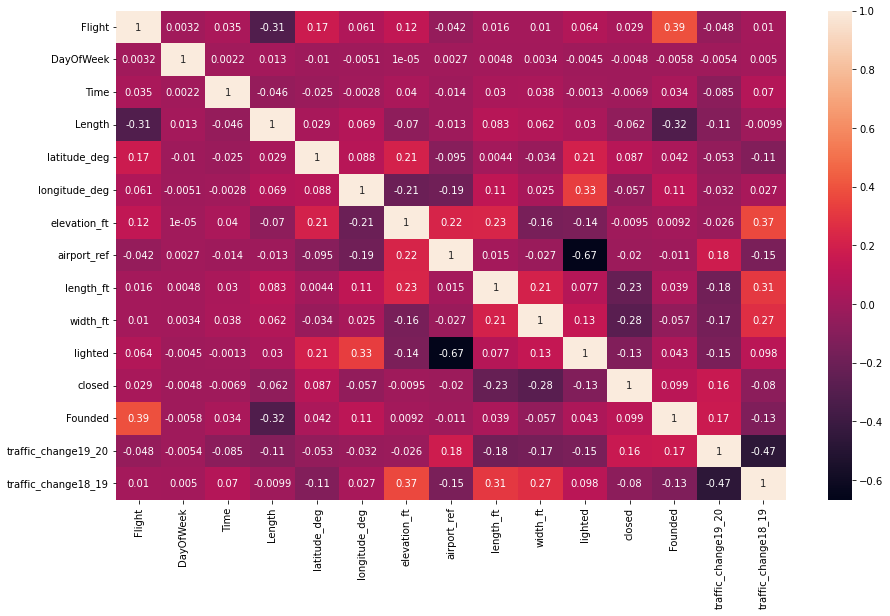

In [73]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
plt.show()

## Project Task: Week 1

### Machine learning

### 1. Use OneHotEncoder and OrdinalEncoder to deal with categorical variables¶

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364277 entries, 0 to 364276
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Airline              364277 non-null  object 
 1   Flight               364277 non-null  int64  
 2   DayOfWeek            364277 non-null  int64  
 3   Time                 364277 non-null  int64  
 4   Length               364277 non-null  int64  
 5   Delay                364277 non-null  int64  
 6   type                 364277 non-null  object 
 7   latitude_deg         364277 non-null  float64
 8   longitude_deg        364277 non-null  float64
 9   elevation_ft         364277 non-null  float64
 10  scheduled_service    364277 non-null  object 
 11  airport_ref          364277 non-null  int64  
 12  length_ft            364277 non-null  float64
 13  width_ft             364277 non-null  float64
 14  lighted              364277 non-null  int64  
 15  closed           

In [75]:
# in the scheduled_service column there is only yes entries there are no NO entries so we cannot apply Labelencoder hence we will drop the column 
df = df.drop(['scheduled_service'], axis=1)

In [76]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [77]:
df['Airline'] = le.fit_transform(df['Airline'])
df['type'] = le.fit_transform(df['type'])
df['hubs'] = le.fit_transform(df['hubs'])

In [78]:
df

,Airline,Flight,DayOfWeek,Time,Length,Delay,type,latitude_deg,longitude_deg,elevation_ft,airport_ref,length_ft,width_ft,lighted,closed,Founded,traffic_change19_20,traffic_change18_19,hubs
0,1,2466,3,20,195,1,0,37.618999,-122.375000,13.0,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,1
1,1,526,3,360,215,0,0,37.618999,-122.375000,13.0,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,1
2,1,552,3,360,315,1,0,37.618999,-122.375000,13.0,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,1
3,1,810,3,385,255,0,0,37.618999,-122.375000,13.0,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,1
4,1,24,3,425,325,1,0,37.618999,-122.375000,13.0,3878,7500.0,200.0,1,0,1926.0,-20034173,-11487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364272,0,4052,4,370,90,0,1,32.847099,-96.851799,487.0,3479,7752.0,150.0,1,0,1985.0,-4738527,273609,0
364273,0,3704,4,705,92,1,1,32.847099,-96.851799,487.0,3479,7752.0,150.0,1,0,1985.0,-4738527,273609,0
364274,0,4060,4,990,90,0,1,32.847099,-96.851799,487.0,3479,7752.0,150.0,1,0,1985.0,-4738527,273609,0
364275,0,4052,5,370,90,1,1,32.847099,-96.851799,487.0,3479,7752.0,150.0,1,0,1985.0,-4738527,273609,0


### 2. Perform the following model building steps:

#### a. Apply logistic regression (use stochastic gradient descent optimizer) and decision tree models

#### b. Use the stratified five-fold method to build and validate the models

#### Note: Make sure you use standardization effectively, ensuring no data leakage and leverage pipelines to have a cleaner code

#### c. Use RandomizedSearchCV for hyperparameter tuning, and use k-fold for crossvalidation

#### d. Keep a few data points (10%) for prediction purposes to evaluate how you would make the final prediction, and do not use this data for testing or validation

#### Note: The final prediction will be based on the voting (majority class by 5 models created using the stratified 5-fold method)

#### g. Compare the results of logistic regression and decision tree classifier¶

In [79]:
# separate target variable and predictor variable
x = df.drop(['Delay'], axis= 1)
y = df["Delay"]

In [80]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)

In [81]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=10)

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
params = {"penalty": ["l1","l2"],
         'solver': ['newton-cg', 'liblinear']}

# Cross Validation
folds = 5

rscv = RandomizedSearchCV(estimator = lr,
                         param_distributions = params,
                         scoring = "accuracy",
                         verbose = 1,
                         cv= folds)

rscv.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'liblinear']},
                   scoring='accuracy', verbose=1)

In [85]:
print(rscv.best_params_)
print(rscv.best_score_)

{'solver': 'newton-cg', 'penalty': 'l2'}
0.5950940921237212


In [86]:
lr = LogisticRegression(penalty= 'l2', solver= 'newton-cg')
lr.fit(x_train,y_train).score(x_train,y_train)

0.5951215346089206

In [87]:
lr.score(x_test, y_test)

0.595640715932799

In [88]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

params = {'criterion': ["gini", "entropy"],
          'min_samples_leaf' : [2,3,4,5,6,7,8,9],
         "max_depth": [2,3,4,5,6,7,8,9]}

rscv = RandomizedSearchCV(estimator = dt,
                             param_distributions= params,
                             scoring = "accuracy",
                             cv= 5,
                             verbose=1)
rscv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9]},
                   scoring='accuracy', verbose=1)

In [89]:
print(rscv.best_params_)
print(rscv.best_score_)

{'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'entropy'}
0.6494209247218237


In [90]:
dtc = DecisionTreeClassifier(max_depth= 9, criterion= 'entropy',min_samples_leaf= 6)

In [91]:
dtc.fit(x_train, y_train).score(x_train, y_train)

0.6552772770391248

In [92]:
dtc.score(x_test, y_test)

0.6503788294718349

### 3. Use the stratified five-fold method to build and validate the models using the XGB classifier, compare all methods, and share your findings¶

In [93]:
from xgboost import XGBClassifier

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
                 'n_estimators': range(8, 20),
                 'max_depth': range(6, 10),
                 'learning_rate': [.4, .45, .5, .55, .6],
                 'colsample_bytree': [.6, .7, .8, .9, 1]
                  }

gbm = XGBClassifier()

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 3)

# Fit randomized_mse to the data
xgb_random.fit(x_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'n_estimators': 17, 'max_depth': 9, 'learning_rate': 0.4, 'colsample_bytree': 0.9}
Best accuracy found:  0.663201656860323


In [94]:
xgb = XGBClassifier(n_estimators=14, max_depth=9, learning_rate=0.45, colsample_bytree=0.9)
xgb.fit(x_train,y_train).score(x_train,y_train)

0.6840710205002913

In [95]:
# Now lets compare the all method.
print(lr.score(x_test, y_test))
print(dtc.score(x_test, y_test))
print(xgb.score(x_test, y_test))

0.595640715932799
0.6503788294718349
0.6635280553420446


##### After comparing the accuracy of all models the best result is seen in the XGBclassifier.

# Project Task: Week 2

## Tableau

### 1. Create a dashboard in Tableau by selecting appropriate chart types and metrics for the business

### Note: Put more emphasis on data storytelling

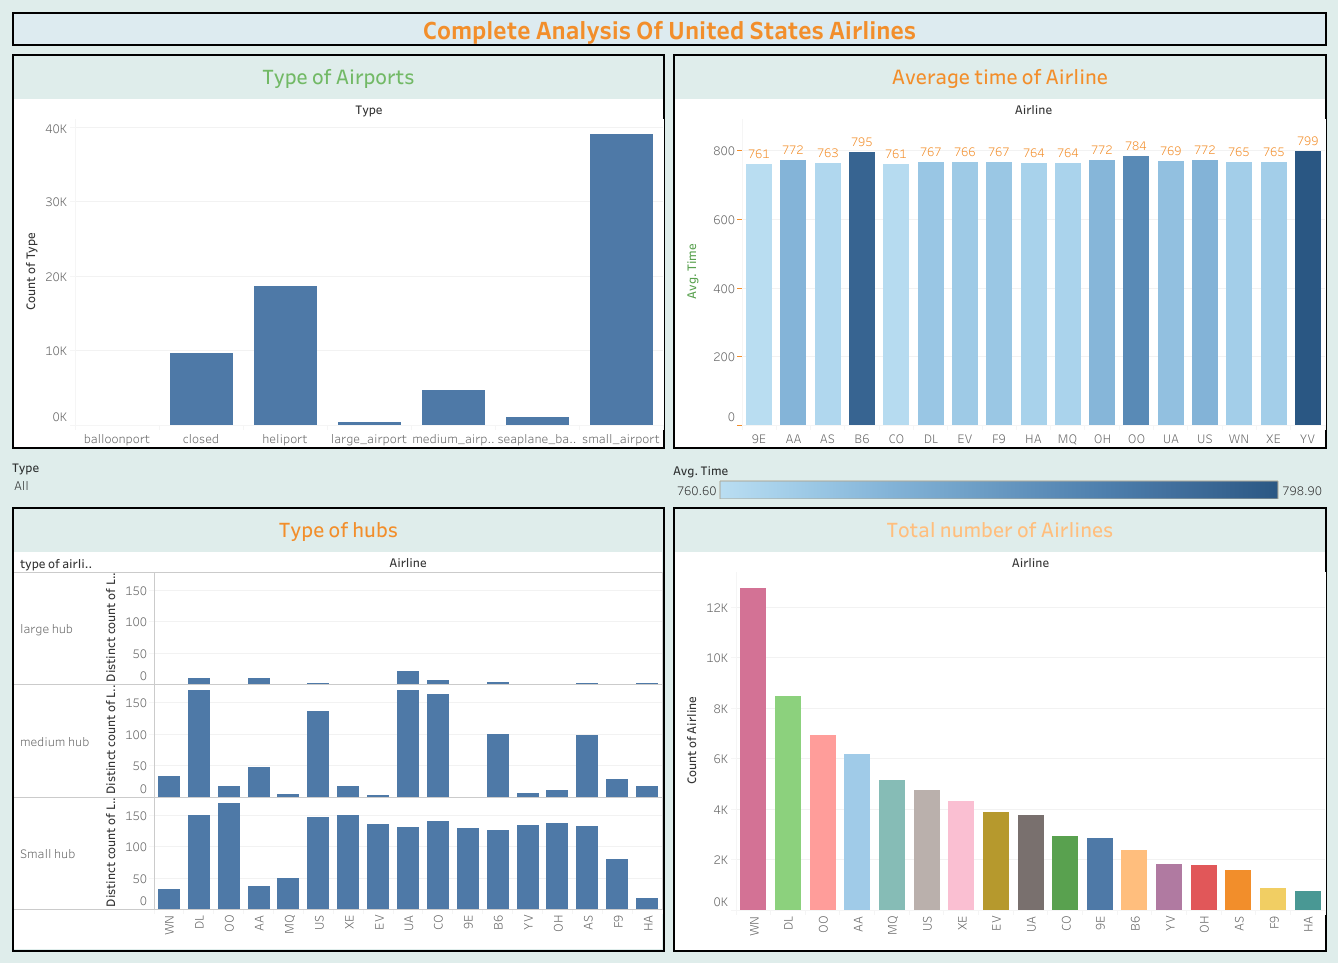

   ## Story Telling

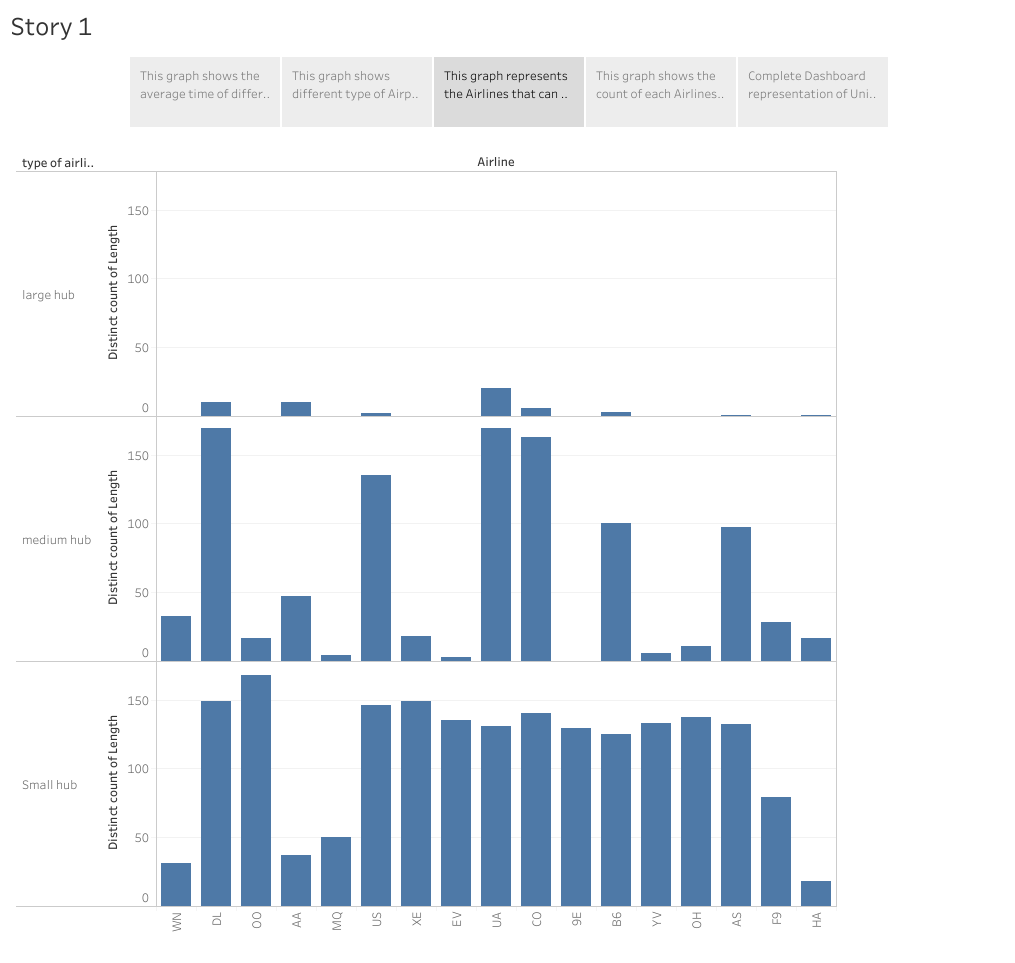

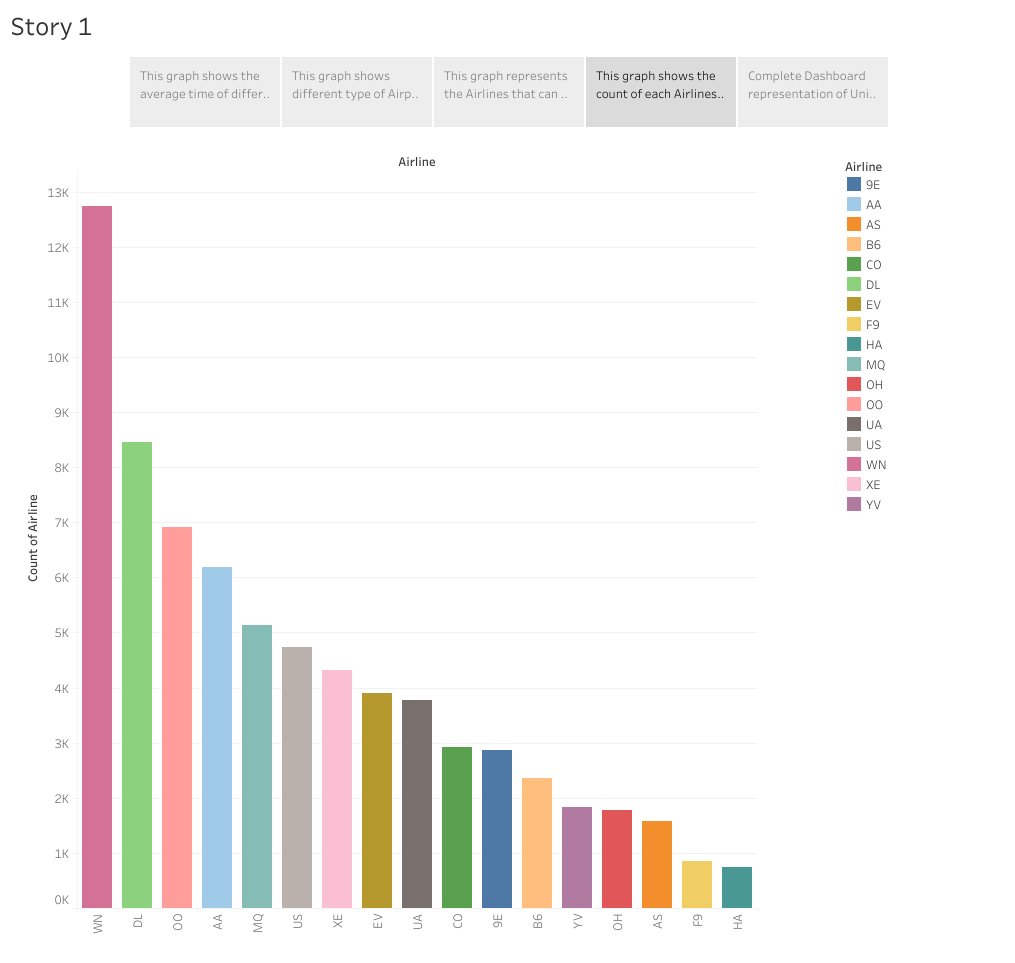

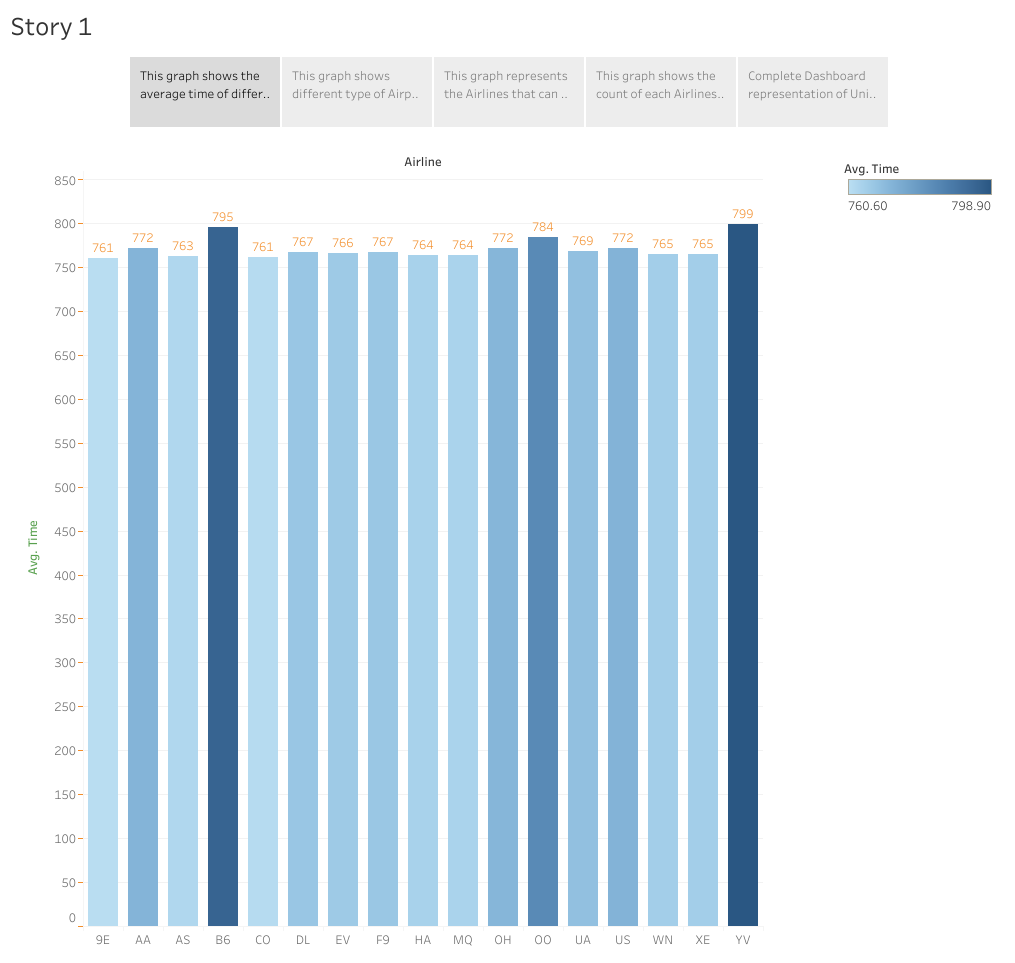

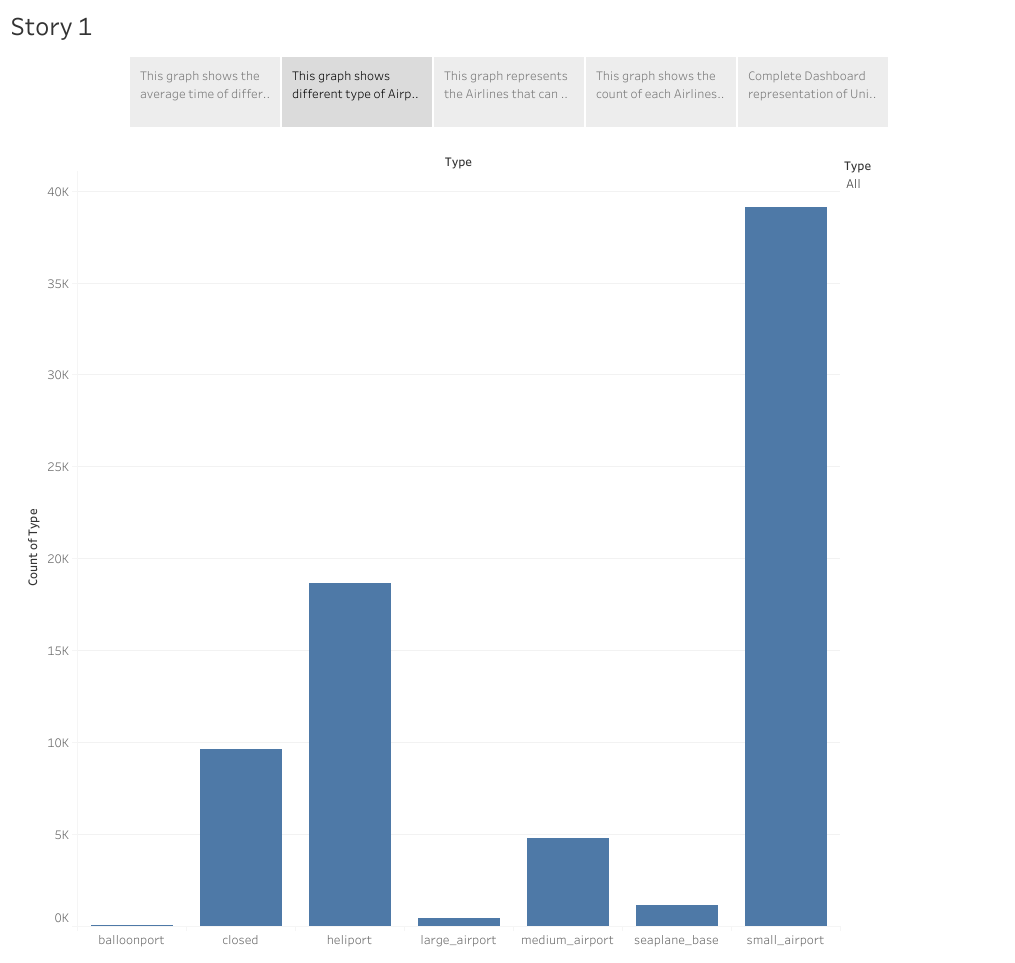

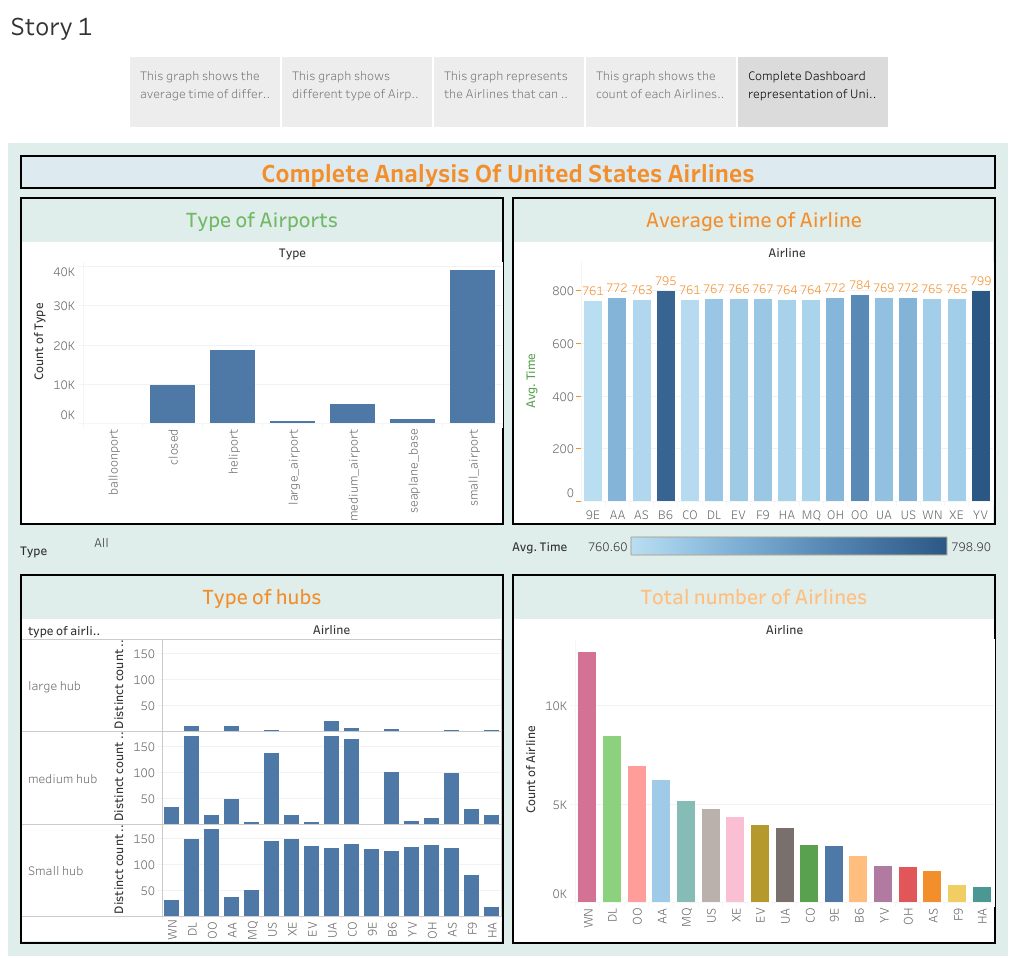

# Project Task: Week 2

## Excel

### 1. Create an Excel dashboard showcasing the following (use form controls to make a dynamic chart):

### a. Compare different airlines based on their on-time performance

### b. Compare the percentage of delayed flights for different days of the week

### c. Create a trend chart for the number of passengers at large and medium hubs

### d. Visualize the count of delayed and on-time flights for different pairs of source and destination airports

### • Create a dynamic chart that allows users to select a source and destination airport.

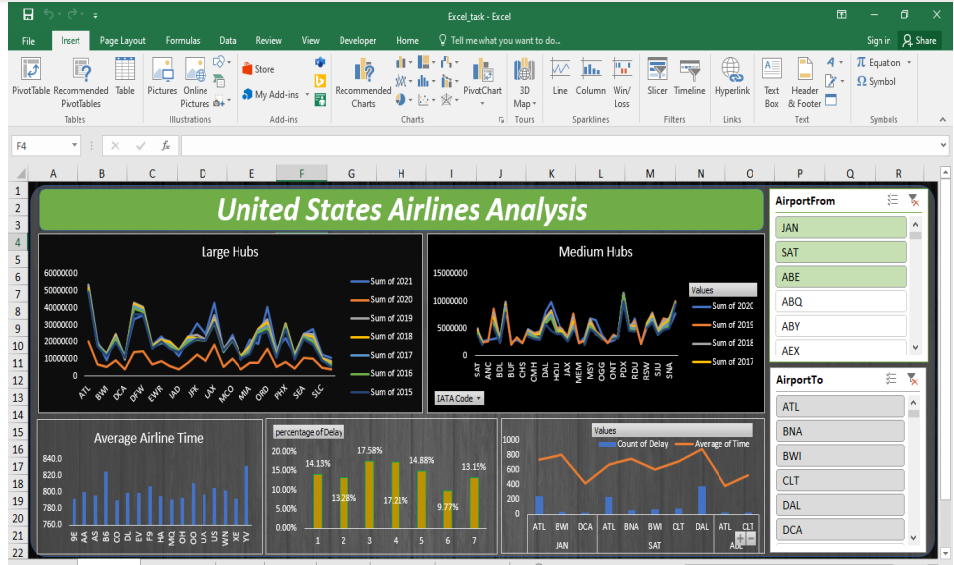

## SQL

### 1. Determine the number of flights that are delayed on various days of the week

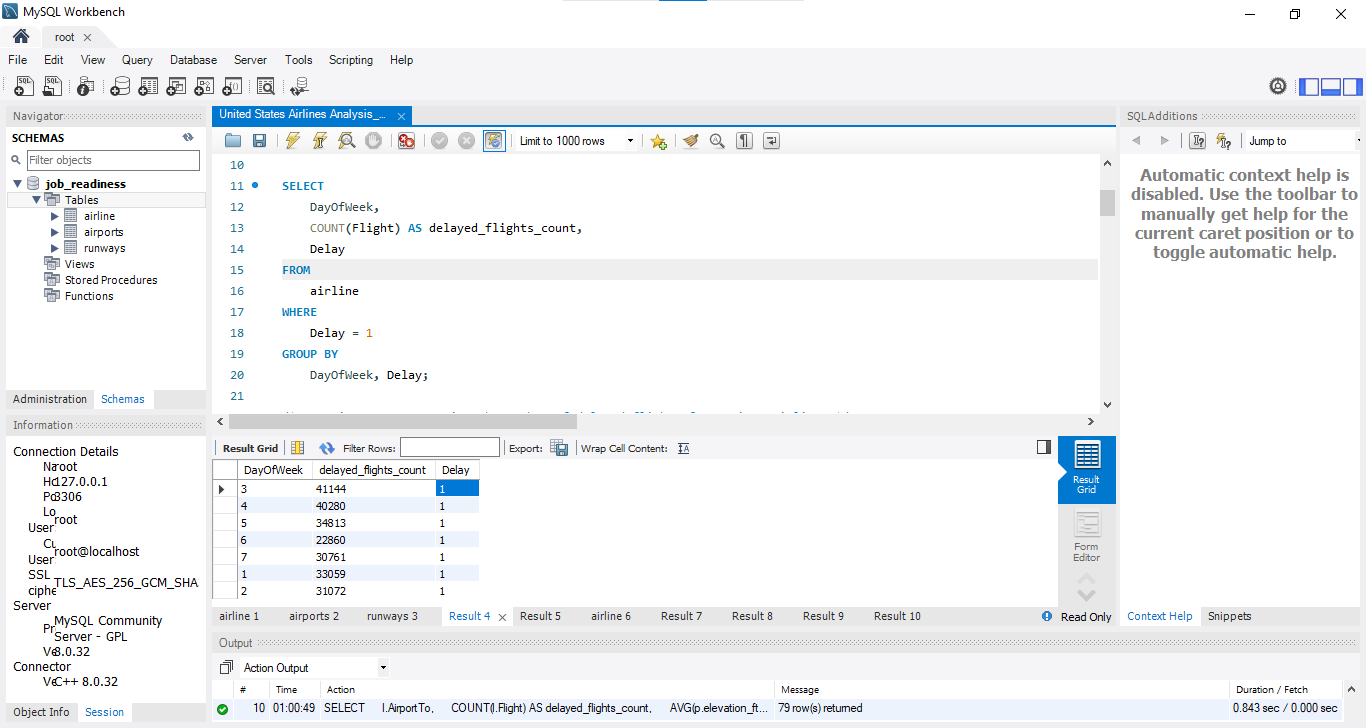

### 2. Determine the number of delayed flights for various airlines

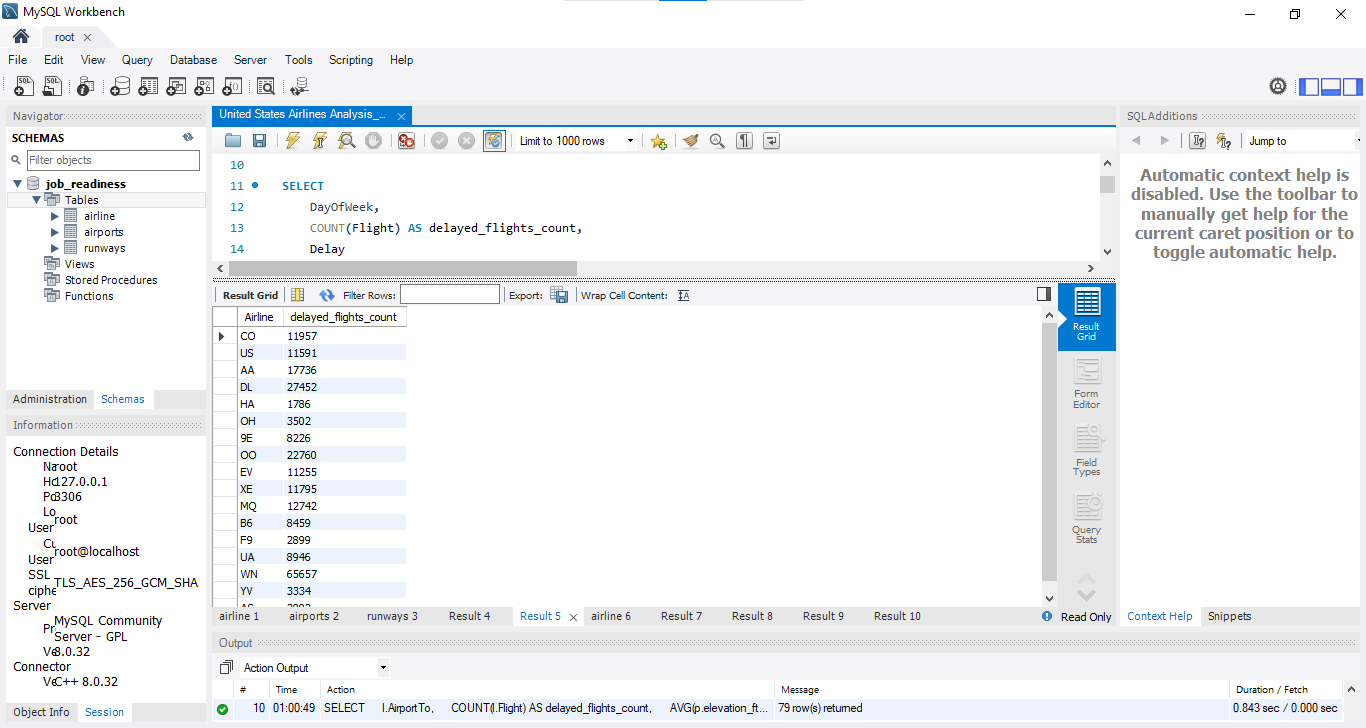

### 3. Determine how many delayed flights land at airports with at least 10 runways

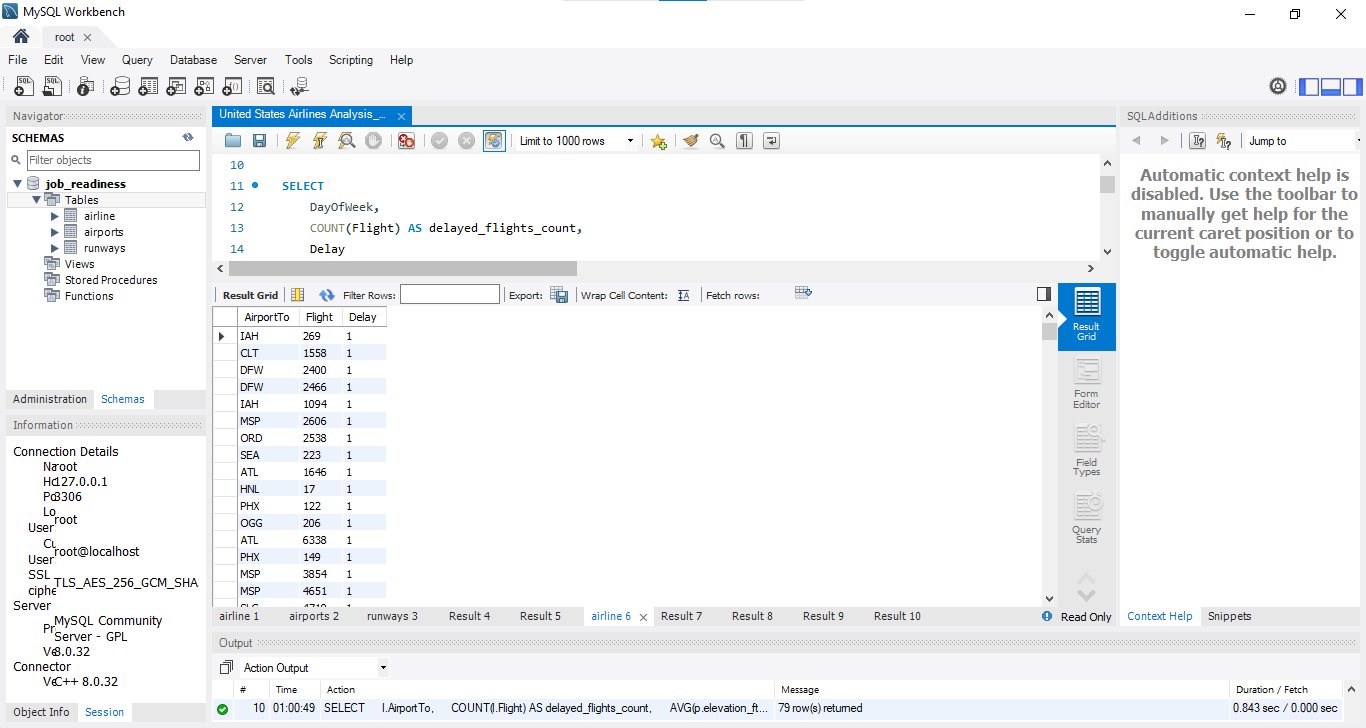

### 4. Compare the number of delayed flights at airports higher than average elevation and those that are lower than average elevation for both source and destination airports

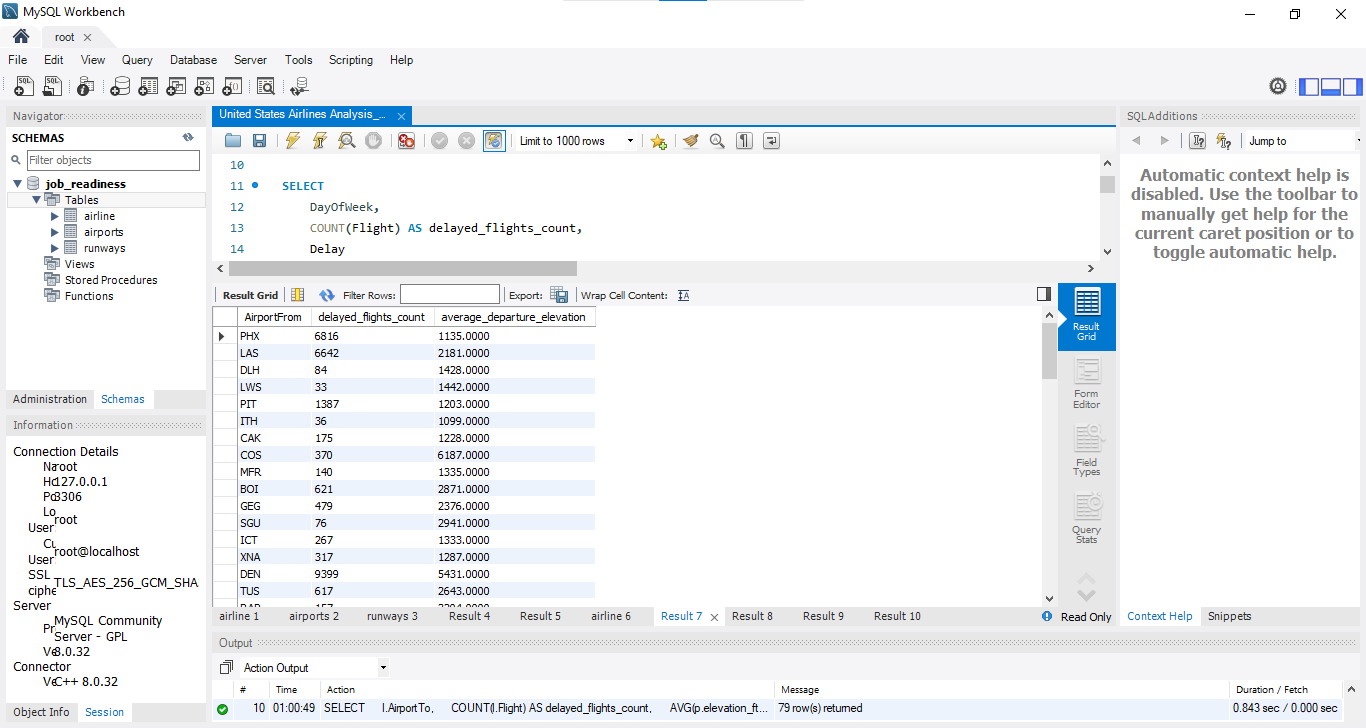

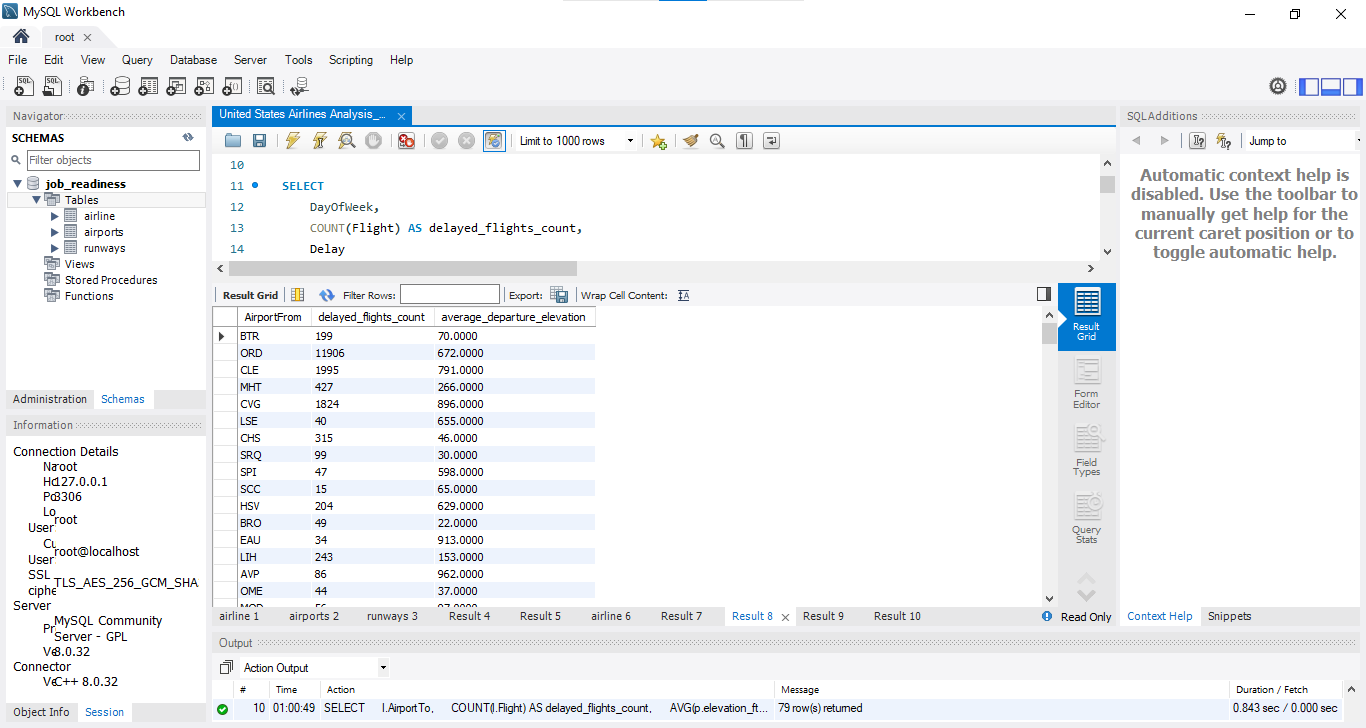

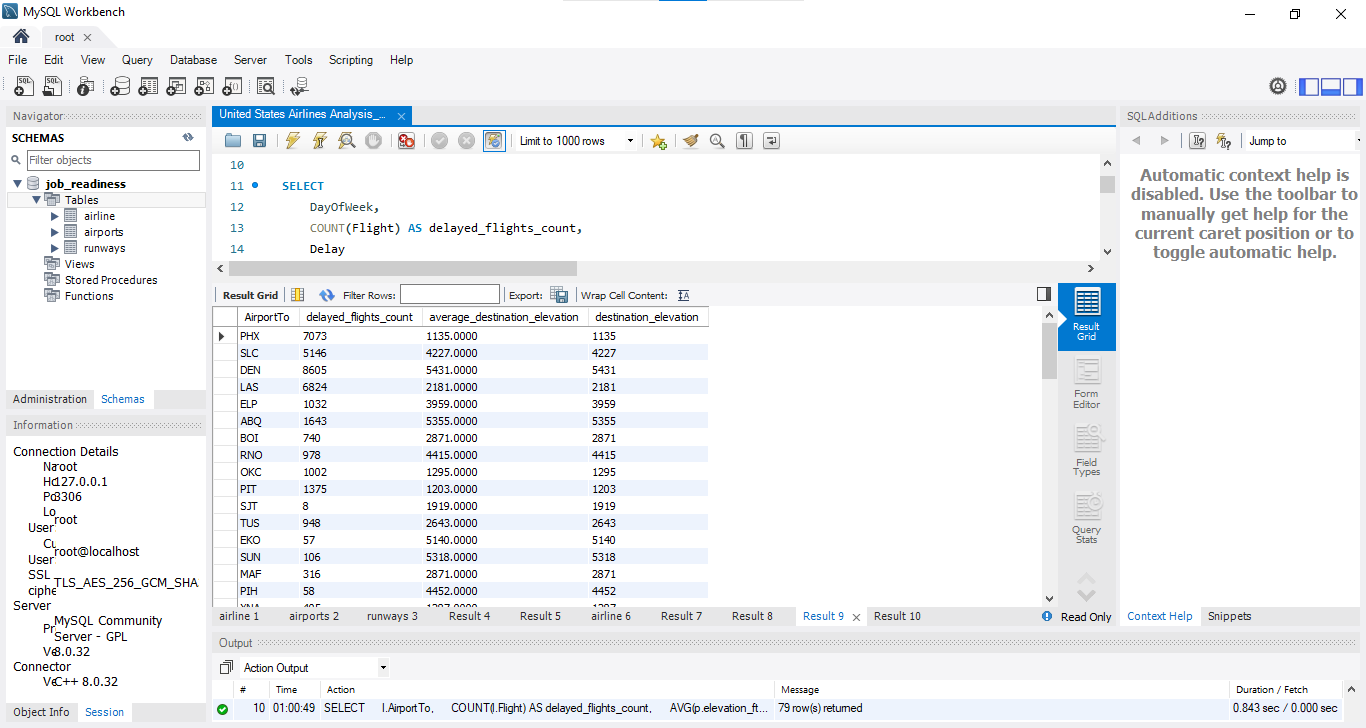

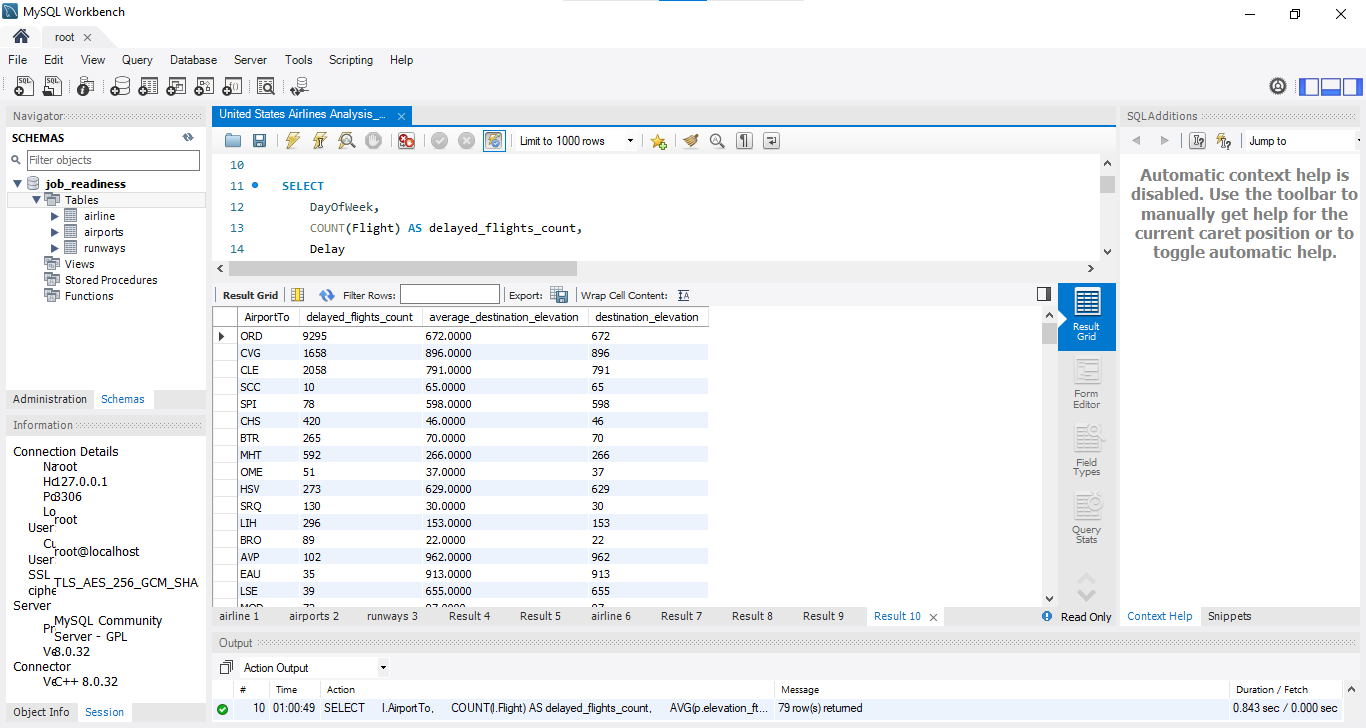